## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Prepare Data

In [ ]:
market_df = pd.read_csv("Mall_Customers.csv")

In [ ]:
market_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [ ]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
market_df.shape

(200, 5)

In [ ]:
market_df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
market_df.nunique()

,0
CustomerID,200
Gender,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


In [ ]:
market_df.duplicated().sum()

0

## Data Preprocessing

In [ ]:
market_df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
market_df = pd.get_dummies(market_df,columns=["Gender"],drop_first=True)
market_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [ ]:
market_df["Gender_Male"] = market_df["Gender_Male"].astype(int)


In [ ]:
market_df.head(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0


## Strorytelling - Visualization

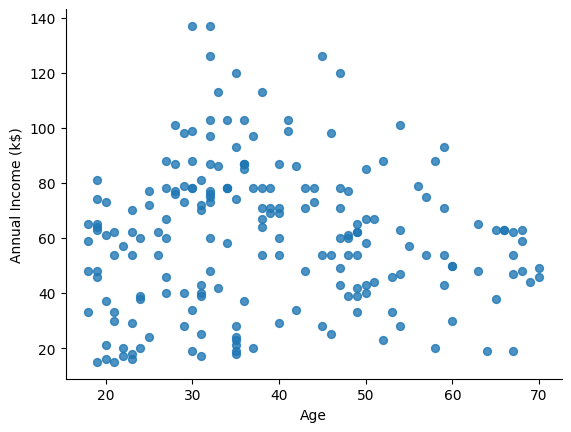

In [ ]:
market_df.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

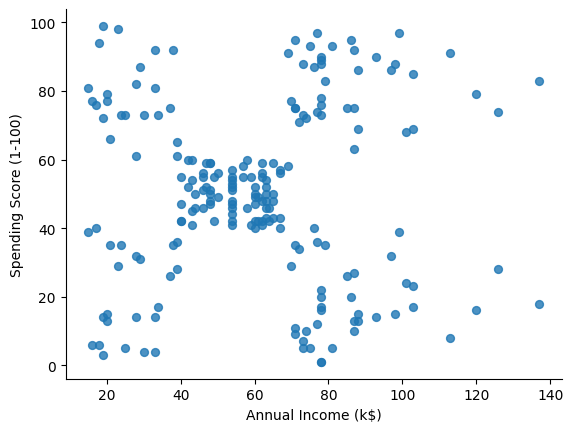

In [ ]:
market_df.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

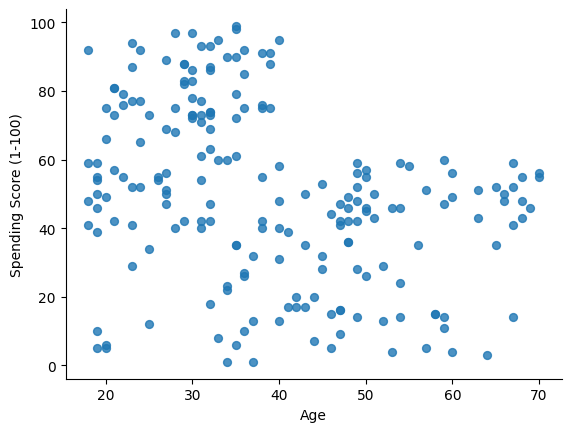

In [ ]:
market_df.plot(kind='scatter', x='Age', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

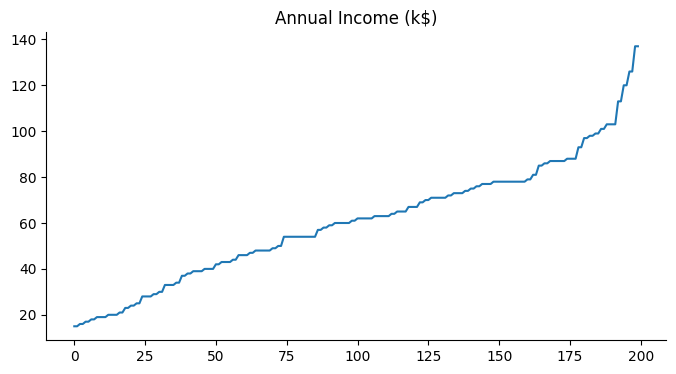

In [ ]:
market_df['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

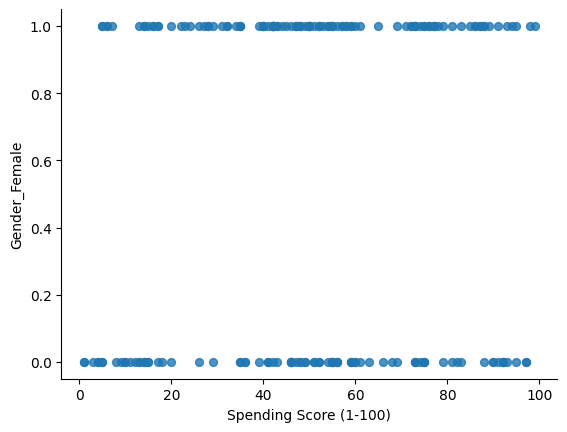

In [ ]:
market_df.plot(kind='scatter', x='Spending Score (1-100)', y='Gender_Female', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Age', ylabel='Count'>

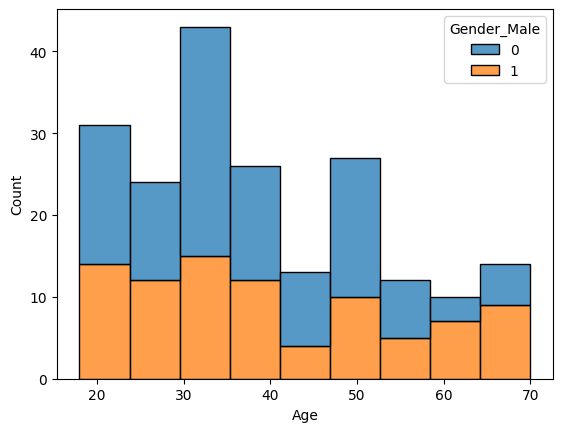

In [ ]:
sns.histplot(data=market_df, x="Age", hue="Gender_Male", multiple="stack")

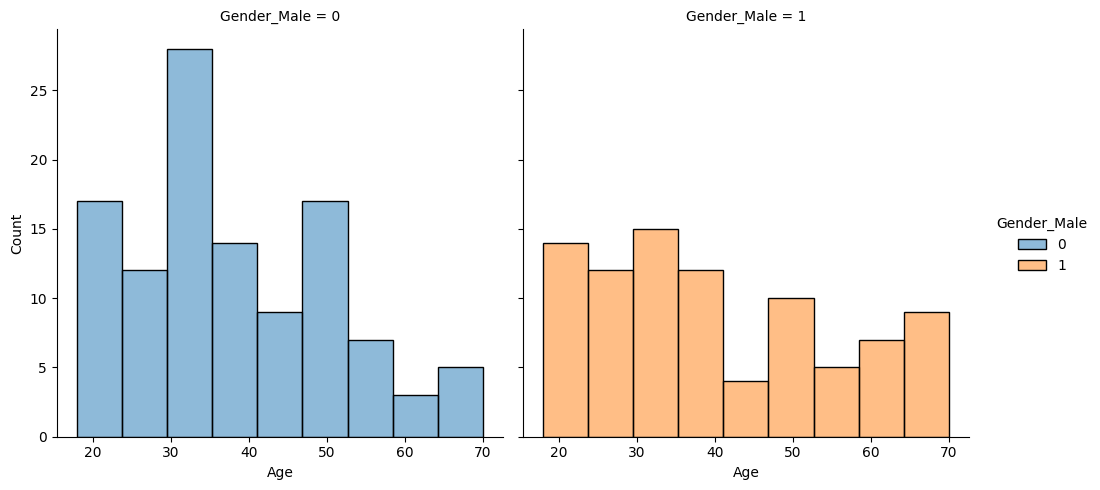

In [ ]:
sns.displot(data=market_df, x="Age", hue="Gender_Male", col="Gender_Male")

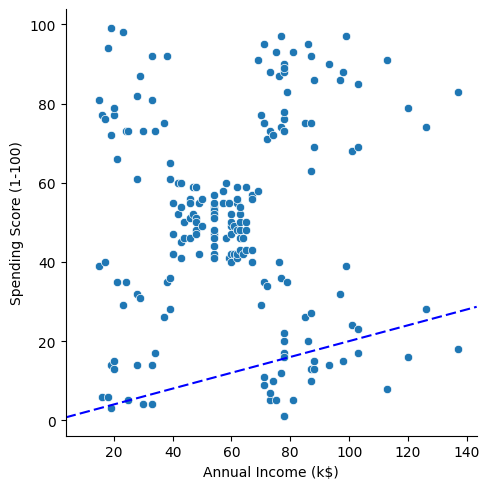

In [ ]:
g = sns.relplot(data=market_df, x="Annual Income (k$)", y="Spending Score (1-100)")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

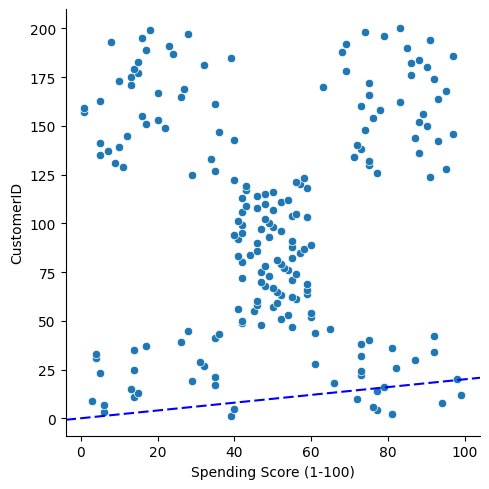

In [ ]:
g = sns.relplot(data=market_df, x="Spending Score (1-100)", y="CustomerID")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

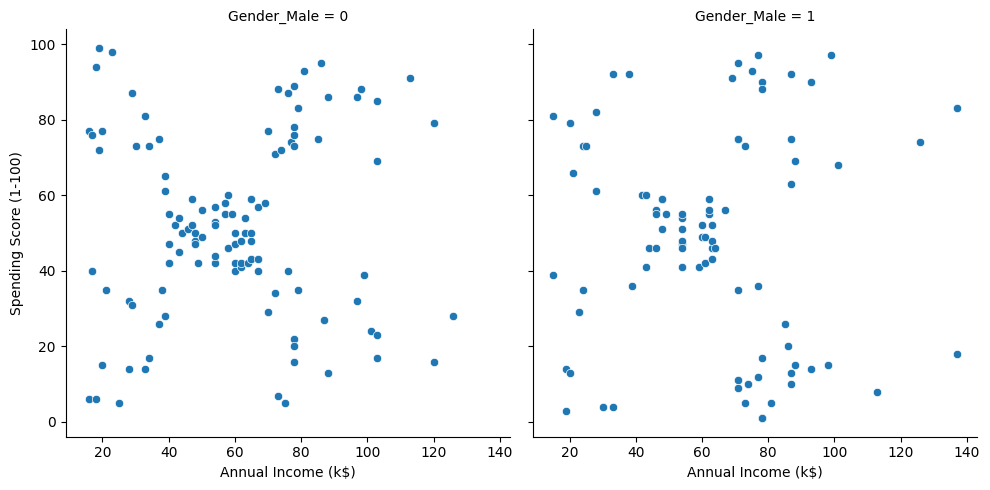

In [ ]:
g = sns.relplot(data=market_df, x="Annual Income (k$)", y="Spending Score (1-100)", col="Gender_Male")
g.set_axis_labels("Annual Income (k$)", "Spending Score (1-100)")

## Trani the Model (Clustering)

KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = market_df.drop(columns=["CustomerID","Spending Score (1-100)"],axis=1)
y = market_df["Spending Score (1-100)"]

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[176158.06000000008,
 87228.95732689215,
 59574.61698578633,
 39551.60942422726,
 32820.22539682537,
 25796.07887299483,
 22566.51723732409,
 19663.040754752496,
 17818.929617590853,
 14942.584314156053]

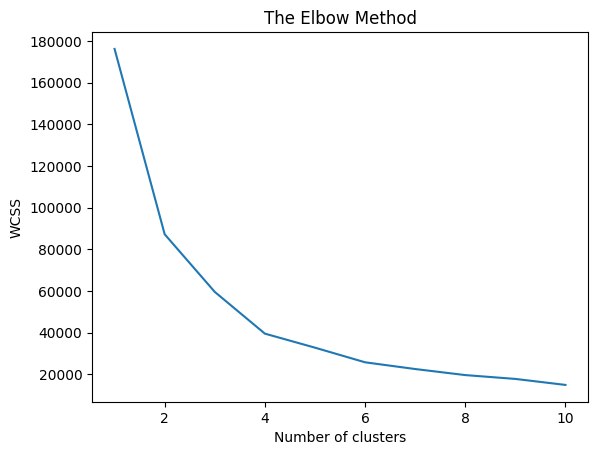

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
kmeans.cluster_centers_

array([[ 55.66071429,  51.01785714,   0.48214286],
       [ 31.95890411,  72.95890411,   0.46575342],
       [ 29.44680851,  29.21276596,   0.36170213],
       [ 39.        , 106.5       ,   0.41666667]])

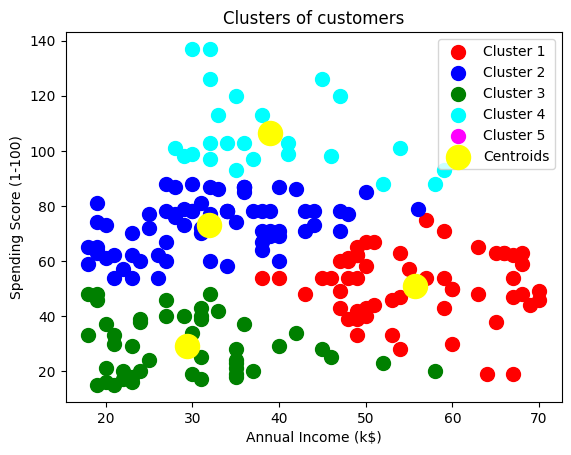

In [ ]:
X = np.array(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-1.42456879, -1.73899919,  1.12815215],
       [-1.28103541, -1.73899919,  1.12815215],
       [-1.3528021 , -1.70082976, -0.88640526],
       [-1.13750203, -1.70082976, -0.88640526],
       [-0.56336851, -1.66266033, -0.88640526],
       [-1.20926872, -1.66266033, -0.88640526],
       [-0.27630176, -1.62449091, -0.88640526],
       [-1.13750203, -1.62449091, -0.88640526],
       [ 1.80493225, -1.58632148,  1.12815215],
       [-0.6351352 , -1.58632148, -0.88640526],
       [ 2.02023231, -1.58632148,  1.12815215],
       [-0.27630176, -1.58632148, -0.88640526],
       [ 1.37433211, -1.54815205, -0.88640526],
       [-1.06573534, -1.54815205, -0.88640526],
       [-0.13276838, -1.54815205,  1.12815215],
       [-1.20926872, -1.54815205,  1.12815215],
       [-0.27630176, -1.50998262, -0.88640526],
       [-1.3528021 , -1.50998262,  1.12815215],
       [ 0.94373197, -1.43364376,  1.12815215],
       [-0.27630176, -1.43364376, -0.88640526],
       [-0.27630176, -1.39547433,  1.128

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

DBSCAN()

In [ ]:
labels = dbscan.labels_
print(f"Cluster Labels: {np.unique(labels)}")

Cluster Labels: [-1  0  1  2  3]


<ipython-input-86-4dbaa6ddc770>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_scaled[labels == label, 0], X_scaled[labels == label, 1],


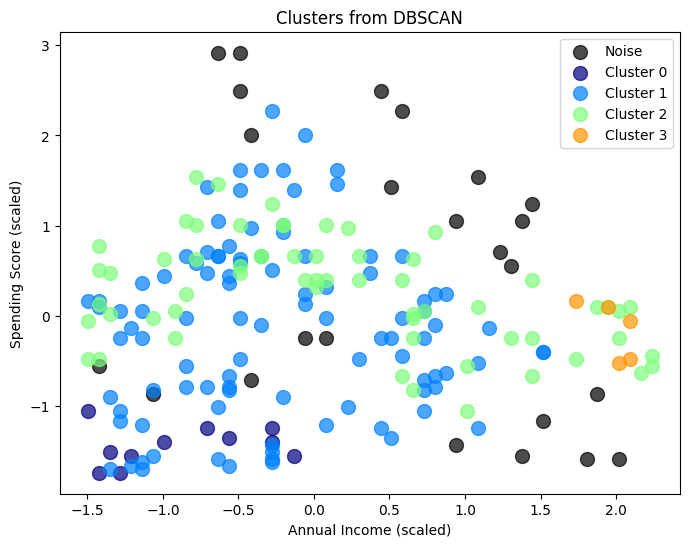

In [ ]:
plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels)
for label in unique_labels:
    if label == -1:  # Noise points
        color = 'black'
        label_name = 'Noise'
    else:
        color = plt.cm.jet(float(label) / max(unique_labels + 1))  # Color by cluster
        label_name = f'Cluster {label}'
    plt.scatter(X_scaled[labels == label, 0], X_scaled[labels == label, 1],
                s=100, c=color, label=label_name, alpha=0.7)
plt.title('Clusters from DBSCAN')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Fit nearest neighbors on the dataset used for DBSCAN
nn = NearestNeighbors(n_neighbors=1).fit(X_scaled)

# New data point (scaled)
new_point = scaler.transform([[60, 70,1]])  # Replace with your input data

# Find nearest neighbors and assign cluster
distance, index = nn.kneighbors(new_point)
if distance[0][0] <= dbscan.eps:
    cluster_label = labels[index[0][0]]
else:
    cluster_label = -1  # Noise

print(f"New point assigned to cluster: {cluster_label}")

New point assigned to cluster: 2


## Send us the Result (Maktabkhoone)